In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [3]:
basepath = '/Users/jukesliu/Documents/TURNER/DATA/figures/'
filelist = []
for file in os.listdir(basepath):
    if file.endswith('.csv') and file.startswith('surface_slopes'):
        print(file)
        filelist.append(file)

surface_slopes_20to30km.csv
surface_slopes_30to20km.csv
surface_slopes_0to6km.csv
surface_slopes_6to20km.csv
surface_slopes_0to20km.csv
surface_slopes_24to28km.csv
surface_slopes_22to30km.csv
surface_slopes_24to30km.csv


In [4]:
# Read in all three
reservior_df = pd.read_csv(basepath+'surface_slopes_6to20km.csv')
reservior_df.datetime = pd.to_datetime(reservior_df.datetime)

receiving_df = pd.read_csv(basepath+'surface_slopes_0to6km.csv')
receiving_df.datetime = pd.to_datetime(receiving_df.datetime)

upper_df = pd.read_csv(basepath+'surface_slopes_22to30km.csv')
upper_df.datetime = pd.to_datetime(upper_df.datetime)

total_df = pd.read_csv(basepath+'surface_slopes_0to20km.csv')
total_df.datetime = pd.to_datetime(total_df.datetime)

In [5]:
reservior_df

,Unnamed: 0,datetime,slope
0,0,2012-08-26,0.045472
1,1,2013-12-07,0.041809
2,2,2014-03-18,0.042164
3,3,2015-10-31,0.049204
4,4,2016-07-17,0.050158
5,5,2018-01-22,0.048442
6,6,2018-01-28,0.048454
7,7,2018-05-07,0.049635
8,8,2019-04-30,0.051320
9,9,2020-06-05,0.045190


In [6]:
(0.050158 - 0.041809) / (0.051320 - 0.041809)

0.877825675533593

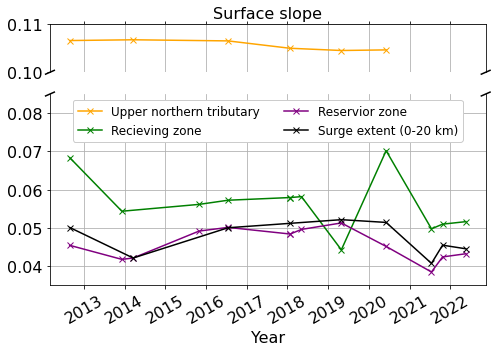

In [28]:
fs = 16
height_factor = 4 # ratio of bottom plot to top plot height
fig, (ax,twinax) = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [1, height_factor]}, figsize=(7,5))
# twinax = ax.twinx()

# plot the same data on both axes
ax.plot(upper_df.datetime, upper_df.slope, '-x', color='orange')
ax.plot(receiving_df.datetime, receiving_df.slope, '-x', color='green')
ax.plot(reservior_df.datetime, reservior_df.slope, '-x', color='purple')
ax.plot(total_df.datetime, total_df.slope, '-kx')

twinax.plot(upper_df.datetime, upper_df.slope, '-x', color='orange')
twinax.plot(receiving_df.datetime, receiving_df.slope, '-x', color='green')
twinax.plot(reservior_df.datetime, reservior_df.slope, '-x', color='purple')
twinax.plot(total_df.datetime, total_df.slope, '-kx')




# zoom-in / limit the view to different portions of the data
twinax.set_ylim(0.035, 0.085)  # bottom
ax.set_ylim(0.10, .11)  # top

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
twinax.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
twinax.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

ax.plot((-d, +d), (-d*height_factor, +d*height_factor), **kwargs) # top-left diagonal
ax.plot((1 - d, 1 + d), (-d*height_factor, +d*height_factor), **kwargs)  # top-right diagonal

kwargs.update(transform=twinax.transAxes)  # switch to the bottom axes
twinax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
twinax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# ax.set_ylim(0.035, 0.075)
# twinax.set_ylim(0.07, 0.11)
twinax.tick_params(labelsize=fs)
# ax.legend(['22 to 30 km'],loc='upper right',fontsize=fs-1)
# twinax.legend(['22 to 30 km','0 to 6 km','6 to 20 km','0 to 20 km'],ncol=2, loc='upper center',fontsize=fs-2,
#              framealpha=1)
twinax.legend(['Upper northern tributary','Recieving zone','Reservior zone','Surge extent (0-20 km)'],
              ncol=2, loc='upper center',fontsize=fs-4,
             framealpha=1)
twinax.set_xlabel('Year',fontsize=fs)
ax.tick_params(labelsize=fs)
twinax.tick_params(axis='x',rotation=30)
ax.grid()
twinax.grid()
# fig.supylabel('Surface slope',fontsize=fs)
ax.set_title('Surface slope',fontsize=fs)
plt.tight_layout()
plt.savefig('/Users/jukesliu/Documents/TURNER/paper1/figures/surface_slopes.png',dpi=300)
plt.show()